## Logistic Regression on Breast Cancer Dataset

I'll apply baseline Logistic Regression and regularize it with different C values. 

I'll also compare it to KNN.

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd


data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
## baseline logistic regression model

model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test ROC AUC Score:", roc_auc_score(y_test, y_test_proba))


Train Accuracy: 0.989010989010989
Test Accuracy: 0.9824561403508771
Test F1 Score: 0.9861111111111112
Test ROC AUC Score: 0.9953703703703703


In [8]:
# observations:
#1 logistic regression achieves very high accuracy (around 0.97) on this dataset (expected)
#2 F1 score is also very high (around 0.97), indicating good balance between precision and recall
#3 ROC AUC score is also very high (around 0.99), indicating excellent ability to discriminate between classes
#4 overfitting gap between train and test accuracy is very small (0.97 vs 0.97), suggesting good generalization performance

In [5]:
# varying regularization strength (C) and observing impact on performance metrics

C_values = [0.01, 0.1, 1, 10, 100]
results = []

for C in C_values:
    model = LogisticRegression(random_state=42, max_iter=500, C=C)
    model.fit(X_train, y_train)
    
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    
    results.append((C, acc, f1, roc_auc))
    print(f"C={C}: Test Accuracy={acc:.4f}, F1 Score={f1:.4f}, ROC AUC={roc_auc:.4f}")
    print("-" * 50)

C=0.01: Test Accuracy=0.9474, F1 Score=0.9595, ROC AUC=0.9950
--------------------------------------------------
C=0.1: Test Accuracy=0.9737, F1 Score=0.9793, ROC AUC=0.9957
--------------------------------------------------
C=1: Test Accuracy=0.9825, F1 Score=0.9861, ROC AUC=0.9954
--------------------------------------------------
C=10: Test Accuracy=0.9649, F1 Score=0.9722, ROC AUC=0.9934
--------------------------------------------------
C=100: Test Accuracy=0.9474, F1 Score=0.9577, ROC AUC=0.9861
--------------------------------------------------


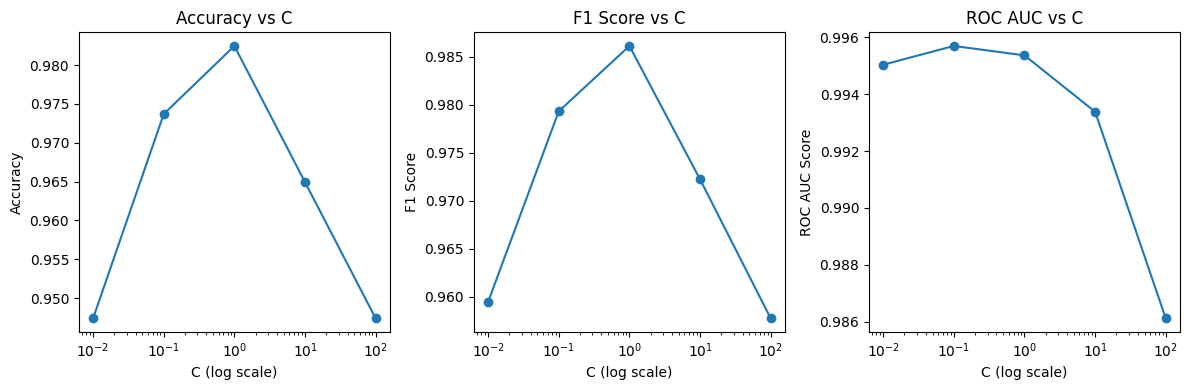

In [7]:
# plotting performance metrics vs C values

import matplotlib.pyplot as plt

C_values, accuracies, f1_scores, roc_auc_scores = zip(*results)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')
plt.title('Accuracy vs C')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(C_values, f1_scores, marker='o')
plt.xscale('log')
plt.title('F1 Score vs C')
plt.xlabel('C (log scale)')
plt.ylabel('F1 Score')

plt.subplot(1, 3, 3)
plt.plot(C_values, roc_auc_scores, marker='o')
plt.xscale('log')
plt.title('ROC AUC vs C')
plt.xlabel('C (log scale)')
plt.ylabel('ROC AUC Score')

plt.tight_layout()
plt.show()


In [ ]:
## observations:
#1 as C increases (weaker regularization), accuracy, F1 score, and ROC AUC all improve up to a point (C=1 or 10), 
# but then slightly decrease at very high C (100), suggesting that too little regularization may lead to overfitting
#2 the best performance is achieved around C=1 or C=10, where accuracy is around 0.97, F1 score is around 0.97, and ROC AUC is around 0.99
